In [21]:
import numpy as np
import pandas as pd
import seaborn as sns


test = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")


In [276]:
test.tail()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,latitud,longitud,barrio,upz,localidad,avaluotercatastral,avaluotercomercial,valorref,uso,predial
48,726088,230.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,4.737032,-74.038290,Las Orquídeas,UPZ Toberín,Localidad Usaquén,1226105.0,2400000.0,2400000.0,RESIDENCIAL,9899.337826
49,752156,230.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,4.735844,-74.038440,Las Orquídeas,UPZ Toberín,Localidad Usaquén,737917.0,1393036.0,2400000.0,RESIDENCIAL,9899.337826
50,1055205,230.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,4.736058,-74.040634,Villa Magdala,UPZ Toberín,Localidad Usaquén,737917.0,1628470.0,2400000.0,RESIDENCIAL,10930.486477
51,1289402,230.0,NaN,NaN,4.0,NaN,0,1.0,NaN,4.0,...,4.737620,-74.040190,Las Orquídeas,UPZ Toberín,Localidad Usaquén,2019245.0,2400000.0,2400000.0,RESIDENCIAL,10930.486477
52,372796,230.0,NaN,NaN,4.0,NaN,0,1.0,NaN,5.0,...,4.702654,-74.058466,La Alhambra,UPZ La Alhambra,Localidad Suba,2099500.0,2470000.0,2500000.0,RESIDENCIAL,15761.230144


In [23]:
test.columns

Index(['id', 'area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'latitud', 'longitud'],
      dtype='object')

In [4]:
len(test)

53

In [44]:
from geopy.geocoders import Nominatim
import time
import random

def getReverse(lat, lon):
    geolocator=Nominatim(user_agent="app_algo1234567801")
    time.sleep(1)
    location= geolocator.reverse(str(lat)+","+str(lon))
    return location.raw

In [25]:
def getAVALUO_CAT_MZ(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=AVALUO_CAT_MZ&groupByFieldsForStatistics=MANZANA_ID&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=AVALUO_CAT_MZ&groupByFieldsForStatistics=MANZANA_ID&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]

def getAVALUO_CAT_MZ_I(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/1/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/1/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]
def getAVALUO_COM_MZ(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscomerciales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscomerciales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]
def getVALOR_REF_2020(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/valorreferencia/MapServer/9/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/valorreferencia/MapServer/9/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]



def getUSO(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/usopredominante/MapServer/9/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/usopredominante/MapServer/9/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]
#Recaudo Predial por Sector 2018
def getPREDIAL(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/ordenamientoterritorial/recaudopredial/MapServer/19/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/ordenamientoterritorial/recaudopredial/MapServer/19/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&distance=+"+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]



In [ ]:
neig=[]
quarter=[]
suburb=[]
avaluoc=[]
avaluocom=[]
valorref=[]
uso=[]
predial=[]
i=0
for row in test.itertuples(index=True, name='Pandas'):
    lat=row.latitud	
    lon=row.longitud
    rev=(getReverse(lat, lon))
    
    neig.append(rev["address"]["neighbourhood"] if rev["address"]["neighbourhood"] is not None else "NA")
    quarter.append(rev["address"]["quarter"] if rev["address"]["quarter"] is not None else "NA" )
    suburb.append(rev["address"]["suburb"] if rev["address"]["suburb"] is not None else "NA")
    avaluoc.append(getAVALUO_CAT_MZ(lat, lon)['attributes']['AVALUO_CAT_MZ'])
    avaluocom.append(getAVALUO_COM_MZ(lat, lon)['attributes']["AVALUO_COM_MZ"])
    valorref.append(getVALOR_REF_2020(lat, lon)['attributes']["V_REF"])
    uso.append(getUSO(lat, lon)['attributes']["USO"])
    f=getPREDIAL(lat, lon)['attributes']
    predial.append(f["RSCVPAGO"]/f["SHAPE.AREA"])
    i=i+1
    print(i)

In [ ]:

neig2=[]
quarter2=[]
suburb2=[]
avaluoc2=[]
avaluocom2=[]
valorref2=[]
uso2=[]
predial2=[]
i=0

In [66]:
print(i)
neig2=neig2[:866]
quarter2=quarter2[:866]
suburb2=suburb2[:866]
avaluoc2=avaluoc2[:866]
avaluocom2=avaluocom2[:866]
valorref2=valorref2[:866]
uso2=uso2[:866]
predial2=predial2[:866]

867


In [ ]:
i=159

for row in train[159:].itertuples(index=True, name='Pandas'):
    lat=row.latitud	
    lon=row.longitud
    rev=(getReverse(lat, lon))
    neig2.append(rev["address"]["neighbourhood"] if "neighbourhood" in  rev["address"] else "NA")
    quarter2.append(rev["address"]["quarter"] if "quarter" in  rev["address"] else "NA" )
    suburb2.append(rev["address"]["suburb"] if "suburb" in  rev["address"] else "NA")
    avaluoc2.append(getAVALUO_CAT_MZ(lat, lon)['attributes']['AVALUO_CAT_MZ'])
    avaluocom2.append(getAVALUO_COM_MZ(lat, lon)['attributes']["AVALUO_COM_MZ"])
    valorref2.append(getVALOR_REF_2020(lat, lon)['attributes']["V_REF"])
    uso2.append(getUSO(lat, lon)['attributes']["USO"])
    f=getPREDIAL(lat, lon)['attributes']
    predial2.append(f["RSCVPAGO"]/f["SHAPE.AREA"])
    i=i+1
    print(i)

In [67]:
train=train[:866]
train["barrio"]=neig2
train["upz"]=quarter2
train["localidad"]=suburb2
train["avaluotercatastral"]=avaluoc2
train["avaluotercomercial"]=avaluocom2
train["valorref"]=valorref2
train["uso"]=uso2
train["predial"]=predial2

<ipython-input-67-a26618a2948f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["barrio"]=neig2
<ipython-input-67-a26618a2948f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["upz"]=quarter2
<ipython-input-67-a26618a2948f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [68]:
train.tail()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,latitud,longitud,barrio,upz,localidad,avaluotercatastral,avaluotercomercial,valorref,uso,predial
861,899633,335.0,NaN,NaN,NaN,NaN,0,NaN,0.0,4.0,...,4.641835,-74.075245,Galerías,UPZ Galerías,Localidad Teusaquillo,1952727.0,2409612.0,2600000.0,RESIDENCIAL,11579.857248
862,1148360,41.0,NaN,NaN,NaN,1.0,0,1.0,0.0,4.0,...,4.639174,-74.075268,Siete de Agosto,UPZ Los Alcázares,Localidad Barrios Unidos,603750.0,2149405.0,825000.0,RESIDENCIAL,8516.899583
863,1061368,285.0,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,...,4.664778,-74.071220,Siete de Agosto,UPZ Los Alcázares,Localidad Barrios Unidos,1874325.0,2507357.0,2900000.0,RESIDENCIAL,8516.899583
864,1204298,132.0,NaN,NaN,NaN,1.0,0,NaN,1.0,3.0,...,4.660447,-74.068325,Polo Club,UPZ Los Alcázares,Localidad Barrios Unidos,1621024.0,1900606.0,3000000.0,RESIDENCIAL,9501.459335
865,1161643,330.0,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,...,4.676304,-74.060088,NA,UPZ Los Alcázares,Localidad Barrios Unidos,1858749.0,2482605.0,3000000.0,RESIDENCIAL,11162.469785


In [27]:
test["barrio"]=neig
test["upz"]=quarter
test["localidad"]=suburb
test["avaluotercatastral"]=avaluoc
test["avaluotercomercial"]=avaluocom
test["valorref"]=valorref
test["uso"]=uso
test["predial"]=predial

In [ ]:
test.head(2)

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,latitud,longitud,barrio,upz,localidad,avaluotercatastral,avaluotercomercial,valorref,uso,predial
0,877392,104.0,NaN,NaN,2.0,NaN,0,NaN,NaN,2.0,...,4.711503,-74.132378,La Faena,UPZ Engativá,Localidad Engativá,1282500.0,1900000.0,2350000.0,RESIDENCIAL,5.965010e+08
1,201483,144.0,NaN,NaN,2.0,NaN,0,NaN,1.0,3.0,...,4.700643,-74.090080,Minuto de Dios,UPZ El Minuto de Dios,Localidad Engativá,1587492.0,2292440.0,2850000.0,RESIDENCIAL,3.576877e+09


In [69]:
test.columns

Index(['id', 'area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'latitud', 'longitud', 'barrio', 'upz', 'localidad',
       'avaluotercatastral', 'avaluotercomercial', 'valorref', 'uso',
       'predial'],
      dtype='object')

<AxesSubplot:>

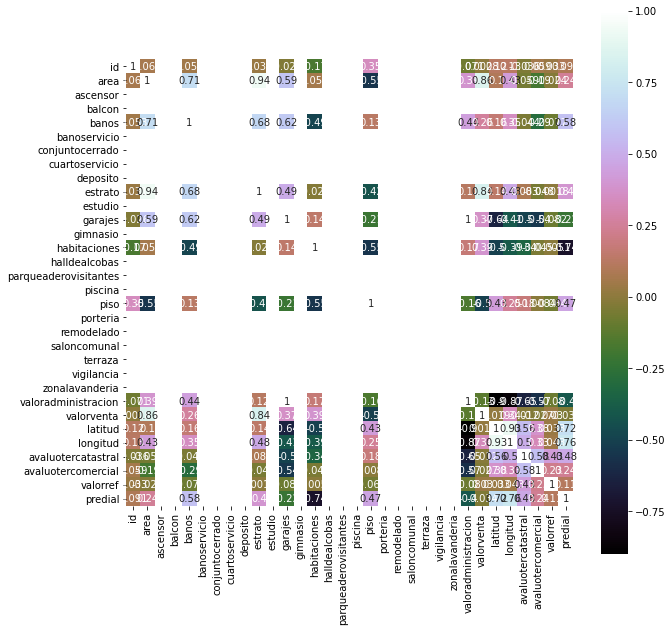

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
test.describe()
#Análisis de correlacion
correlation = test.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [71]:
test.describe()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,vigilancia,zonalavanderia,valoradministracion,valorventa,latitud,longitud,avaluotercatastral,avaluotercomercial,valorref,predial
count,5.300000e+01,53.000000,0.0,14.0,53.000000,0.0,53.0,7.0,27.0,53.000000,...,17.0,29.0,45.000000,5.300000e+01,53.000000,53.000000,5.300000e+01,5.300000e+01,5.200000e+01,53.000000
mean,6.960469e+05,153.471698,NaN,1.0,2.792453,NaN,0.0,1.0,1.0,3.094340,...,1.0,1.0,35333.333333,4.360057e+08,4.706348,-74.088809,1.343581e+06,2.159267e+06,2.456346e+06,8661.861995
std,3.584821e+05,28.876131,NaN,0.0,0.631192,NaN,0.0,0.0,0.0,0.449964,...,0.0,0.0,62870.718723,1.571573e+08,0.041581,0.035541,3.910383e+05,3.895121e+05,4.463272e+05,3907.328601
min,7.862200e+04,104.000000,NaN,1.0,2.000000,NaN,0.0,1.0,1.0,2.000000,...,1.0,1.0,0.000000,1.850000e+08,4.633404,-74.146896,6.210000e+05,7.500000e+05,7.800000e+05,1793.645848
25%,4.249850e+05,144.000000,NaN,1.0,2.000000,NaN,0.0,1.0,1.0,3.000000,...,1.0,1.0,0.000000,3.300000e+08,4.699873,-74.093254,8.997450e+05,2.154007e+06,2.400000e+06,5480.852120
50%,6.306310e+05,145.000000,NaN,1.0,3.000000,NaN,0.0,1.0,1.0,3.000000,...,1.0,1.0,0.000000,3.700000e+08,4.702654,-74.090080,1.528732e+06,2.333681e+06,2.500000e+06,7198.719700
75%,9.398430e+05,150.000000,NaN,1.0,3.000000,NaN,0.0,1.0,1.0,3.000000,...,1.0,1.0,0.000000,5.149900e+08,4.744143,-74.063286,1.587492e+06,2.400000e+06,2.550000e+06,12867.270326
max,1.368608e+06,230.000000,NaN,1.0,4.000000,NaN,0.0,1.0,1.0,5.000000,...,1.0,1.0,150000.000000,9.300000e+08,4.744805,-74.038290,2.099500e+06,2.553863e+06,2.900000e+06,15761.230144


In [72]:
from sklearn.impute import SimpleImputer
import numpy as np


# Creando un objeto ``SimpleImputer``
impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='constant',  # La estrategia escogida es reemplazar por una constante
    fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)

In [73]:
print("Valores nulos antes de transformación SimpleImputer: \n\n{}\n".format(train.isnull().sum(axis = 0)))

impute_zeros.fit(X=train)

dftrain = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=train
    ),  # El resultado SimpleImputer.transform(<<pandas dataframe>>) es una lista de listas
    columns=train.columns  # Las columnas originals deben ser conservadas en esta transformación
)

print("Valores nulos del dataset despues de la transformación SimpleImputer: \n\n{}\n".format(dftrain.isnull().sum(axis = 0)))

Valores nulos antes de transformación SimpleImputer: 

id                         0
area                      24
ascensor                 842
balcon                   777
banos                    866
banoservicio             783
conjuntocerrado            0
cuartoservicio           779
deposito                 158
estrato                  123
estudio                  866
garajes                  532
gimnasio                 158
habitaciones             142
halldealcobas            863
parqueaderovisitantes    746
piscina                  850
piso                     862
porteria                 853
remodelado               815
saloncomunal             640
terraza                  790
tiempodeconstruido       829
vigilancia               866
vista                    623
zonalavanderia           556
valoradministracion      146
valorventa                 0
tipoinmueble               0
tiponegocio                0
latitud                    0
longitud                   0
barrio           

In [74]:
print("Valores nulos antes de transformación SimpleImputer: \n\n{}\n".format(test.isnull().sum(axis = 0)))
impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='constant',  # La estrategia escogida es reemplazar por una constante
    fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)
impute_zeros.fit(X=test)

df = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=test
    ),  # El resultado SimpleImputer.transform(<<pandas dataframe>>) es una lista de listas
    columns=test.columns  # Las columnas originals deben ser conservadas en esta transformación
)

print("Valores nulos del dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de transformación SimpleImputer: 

id                        0
area                      0
ascensor                 53
balcon                   39
banos                     0
banoservicio             53
conjuntocerrado           0
cuartoservicio           46
deposito                 26
estrato                   0
estudio                  31
garajes                   0
gimnasio                 53
habitaciones              0
halldealcobas            32
parqueaderovisitantes    52
piscina                  53
piso                     25
porteria                 53
remodelado               53
saloncomunal             52
terraza                  39
tiempodeconstruido        0
vigilancia               36
vista                    51
zonalavanderia           24
valoradministracion       8
valorventa                0
tipoinmueble              0
tiponegocio               0
latitud                   0
longitud                  0
barrio                    0
upz                  

In [75]:
df.tail()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,latitud,longitud,barrio,upz,localidad,avaluotercatastral,avaluotercomercial,valorref,uso,predial
48,726088,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.737032,-74.038290,Las Orquídeas,UPZ Toberín,Localidad Usaquén,1226105.0,2400000.0,2400000.0,RESIDENCIAL,9899.337826
49,752156,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.735844,-74.038440,Las Orquídeas,UPZ Toberín,Localidad Usaquén,737917.0,1393036.0,2400000.0,RESIDENCIAL,9899.337826
50,1055205,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.736058,-74.040634,Villa Magdala,UPZ Toberín,Localidad Usaquén,737917.0,1628470.0,2400000.0,RESIDENCIAL,10930.486477
51,1289402,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.737620,-74.040190,Las Orquídeas,UPZ Toberín,Localidad Usaquén,2019245.0,2400000.0,2400000.0,RESIDENCIAL,10930.486477
52,372796,230.0,0,0.0,4.0,0,0,1.0,0.0,5.0,...,4.702654,-74.058466,La Alhambra,UPZ La Alhambra,Localidad Suba,2099500.0,2470000.0,2500000.0,RESIDENCIAL,15761.230144


In [167]:
df2 = df.drop(columns=[ 'id',"latitud","longitud"], inplace=False)

In [168]:
df2train = dftrain.drop(columns=[ 'id',"latitud","longitud"], inplace=False)

In [231]:
df2train["valorventa"].tail()

861    1.200000e+09
862    2.691610e+08
863    1.450000e+09
864    6.000000e+08
865    1.700000e+09
Name: valorventa, dtype: float64

In [241]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)

df3 = pd.get_dummies(df2, columns=['tipoinmueble',
       'tiponegocio',  'upz', 'localidad',"estrato", 'uso', "vista",'tiempodeconstruido'])

In [242]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
df3train = pd.get_dummies(df2train, columns=['tipoinmueble',
       'tiponegocio', 'upz', 'localidad',"estrato", 'uso', "vista",'tiempodeconstruido'])

del df3["barrio"]
del df3train["barrio"]

In [243]:
print((df3.columns))
df3train.columns

Index(['area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estudio', 'garajes',
       'gimnasio', 'habitaciones', 'halldealcobas', 'parqueaderovisitantes',
       'piscina', 'piso', 'porteria', 'remodelado', 'saloncomunal', 'terraza',
       'vigilancia', 'zonalavanderia', 'valoradministracion', 'valorventa',
       'avaluotercatastral', 'avaluotercomercial', 'valorref', 'predial',
       'tipoinmueble_Casa', 'tiponegocio_Venta', 'upz_UPZ Britalia',
       'upz_UPZ Castilla', 'upz_UPZ El Minuto de Dios', 'upz_UPZ Engativá',
       'upz_UPZ La Alhambra', 'upz_UPZ Toberín',
       'localidad_Localidad Engativá', 'localidad_Localidad Kennedy',
       'localidad_Localidad Suba', 'localidad_Localidad Usaquén',
       'estrato_2.0', 'estrato_3.0', 'estrato_4.0', 'estrato_5.0', 'uso_OTROS',
       'uso_RESIDENCIAL', 'vista_0', 'vista_Exterior',
       'tiempodeconstruido_1 a 8 años', 'tiempodeconstruido_16 a 30 años',
       'tiempo

Index(['area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estudio', 'garajes',
       ...
       'uso_RESIDENCIAL', 'uso_UNIVERSIDADES Y COLEGIOS', 'vista_0',
       'vista_Exterior', 'vista_Interior', 'tiempodeconstruido_0',
       'tiempodeconstruido_Entre 0 y 5 años',
       'tiempodeconstruido_Entre 10 y 20 años',
       'tiempodeconstruido_Entre 5 y 10 años',
       'tiempodeconstruido_Más de 20 años'],
      dtype='object', length=169)

In [244]:
df3.tail()

,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estudio,garajes,...,estrato_5.0,uso_OTROS,uso_RESIDENCIAL,vista_0,vista_Exterior,tiempodeconstruido_1 a 8 años,tiempodeconstruido_16 a 30 años,tiempodeconstruido_9 a 15 años,tiempodeconstruido_Entre 10 y 20 años,tiempodeconstruido_Más de 20 años
48,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0,0,1,1,0,0,0,0,0,1
49,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0,0,1,1,0,0,0,0,0,1
50,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0,0,1,1,0,0,0,0,0,1
51,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0,0,1,1,0,0,0,0,0,1
52,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,1,0,1,0,1,0,0,0,1,0


In [246]:
for i in df3train.columns:
    if(not i in df3.columns):
        #df3.boxplot(column=i, by='valorventa', figsize=(20,5))
        df3[i]=np.zeros(len(df3))
        

for j in df3.columns:
    if(not j in  df3train.columns):
        #df3.boxplot(column=i, by='valorventa', figsize=(20,5))
        df3train[j]=np.zeros(len(df3train))



In [247]:
print(len(df3.columns))
print(len(df3train.columns))

172
172


In [177]:
for i in df3train.columns:
    if(df3[i].mean()<=0.0 and df3train[i].mean()<=0.0):
        #df3.boxplot(column=i, by='valorventa', figsize=(20,5))
        del df3[i]
        del df3train[i]
        

In [248]:
# Método para creacion de modelos 
from sklearn.cluster import KMeans

kmeans = KMeans( random_state=50).fit(df3train)
classified_data = kmeans.labels_
centroids  = kmeans.cluster_centers_ 



In [249]:
y_kmeans = kmeans.predict(df3train)

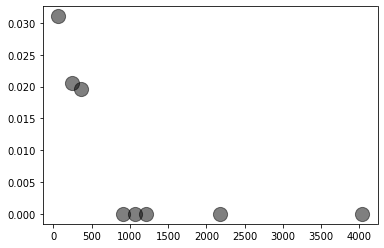

In [250]:
#plt.scatter(df3train[:, 0], df3train[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [251]:
label = kmeans.predict(df3)
print(label)
prices=[]
#Getting unique labels
def getFinalPrice():
    ind=0
    for row in df3.itertuples(index=True, name='Pandas'):
        avc=row.avaluotercatastral
        ar=row.area
        print(label[ind])
        print(df3["valorventa"][label[ind]])
        temp=(df3["valorventa"][label[ind]]/df3["area"][label[ind]])
        print(temp)
        var=min(temp,row.valorventa/row.area if row.area>0 else -1)
        incr=(var-avc)*0.51
        prices.append(avc+incr)
        ind=ind+1

getFinalPrice()

[3 3 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0]
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
3
519000000.0
3579310.3448275863
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
0
185000000.0
1778846.1538461538
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863
3
519000000.0
3579310.3448275863


In [254]:
df3["valormt2_predicted"]=prices

In [255]:
df3.tail()

,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estudio,garajes,...,uso_BODEGAS,uso_COMERCIO,uso_INDUSTRIA,uso_OFICINAS,uso_UNIVERSIDADES Y COLEGIOS,vista_Interior,tiempodeconstruido_0,tiempodeconstruido_Entre 0 y 5 años,tiempodeconstruido_Entre 5 y 10 años,valormt2_predicted
48,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.508003e+06
49,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.268791e+06
50,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.268791e+06
51,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.896642e+06
52,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.935967e+06


In [252]:
print(prices)

[1535636.5384615385, 2541621.08, 2541621.08, 1211501.5384615385, 1740211.5384615385, 1740211.5384615385, 1502353.7784615385, 1740211.5384615385, 1707902.5142857144, 1462822.5384615385, 1211501.5384615385, 1685082.6184615383, 1685082.6184615383, 1211501.5384615385, 1740211.5384615385, 1779645.2684615385, 1685082.6184615383, 1869542.6966666668, 1915044.01, 1917828.68, 2073531.9733333334, 1975258.683333333, 2011209.3633333333, 1917828.68, 1988662.0133333332, 1864703.68, 1917828.68, 2010675.3499999999, 1846995.3466666667, 2065104.2908695652, 1841935.822857143, 1951221.5371428572, 1802722.5814285714, 1805507.2514285715, 1841935.822857143, 1900911.744285714, 1996823.96, 1766875.05, 1766875.05, 1588750.0, 1698875.0499999998, 1664875.05, 1698875.0499999998, 1588750.0, 1698875.0499999998, 1698875.0499999998, 1698875.0499999998, 1493415.1984615384, 1508002.9884615385, 1268790.8684615386, 1268790.8684615386, 1896641.5884615383, 1935966.5384615385]


In [279]:
c=df3
c["id"]=test["id"]
c = c.round(3)
c[["id","valormt2_predicted"]].to_csv('results_test.csv', header=True, index=False)

In [278]:
c.tail()

,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estudio,garajes,...,uso_COMERCIO,uso_INDUSTRIA,uso_OFICINAS,uso_UNIVERSIDADES Y COLEGIOS,vista_Interior,tiempodeconstruido_0,tiempodeconstruido_Entre 0 y 5 años,tiempodeconstruido_Entre 5 y 10 años,valormt2_predicted,id
48,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1508002.99,726088
49,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1268790.87,752156
50,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1268790.87,1055205
51,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1896641.59,1289402
52,230.0,0,0.0,4.0,0,0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935966.54,372796


In [280]:
import joblib
joblib.dump(kmeans, 'model-kmeans.joblib') 
eje = joblib.load('model-kmeans.joblib')

In [ ]:
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100